In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

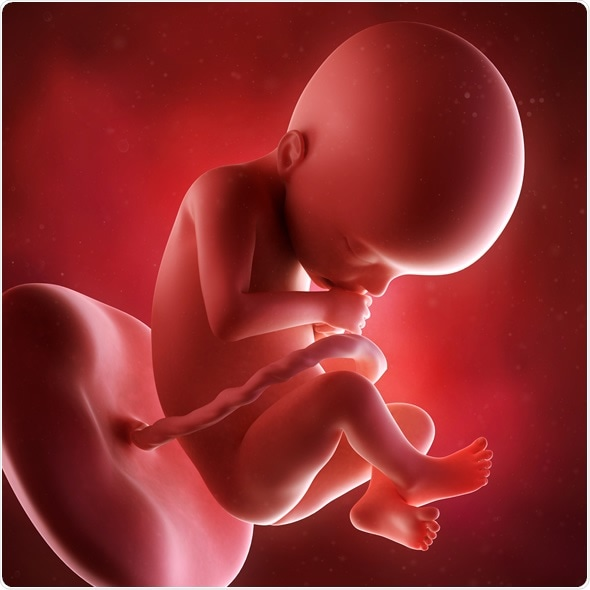](http://https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.news-medical.net%2Fhealth%2FPregnancy-21-24-weeks.aspx&psig=AOvVaw2T7Mazil49a9Z30UF_1n7P&ust=1626015715445000&source=images&cd=vfe&ved=0CAoQjRxqFwoTCMCR4tri2PECFQAAAAAdAAAAABAD)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_style('darkgrid')

# Reading the dataset

In [ ]:
data  = pd.read_csv('/kaggle/input/fetal-health-classification/fetal_health.csv', sep = ',')
df = pd.DataFrame(data)
df.head()

In [ ]:
df.describe().T

In [ ]:
df.info()

# No Null values observed

In [ ]:
df.isna().sum()

In [ ]:
df.fetal_health.unique()

# Checking the status of fetal health
# Data is imblanced

In [ ]:
sns.countplot(x = 'fetal_health', data = df)
plt.title('Count plot of Fetal Heath', fontsize = 12)

# Establishing corelation 

In [ ]:
plt.figure(figsize = (15,10))
corr = df.corr()
sns.heatmap(corr, cmap = 'coolwarm', linewidth = 0.5)

# Fetal Health based on other factors of the dataset

In [ ]:
plt.figure(figsize=(25,25))
i=1
for col in df.columns:
    plt.subplot(6,4,i)
    sns.boxplot(x = 'fetal_health', y = col, data = df)
    i+=1

# Count plot with hue as fetal health

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(25,25))
i=1
for col in df.columns:
    plt.subplot(6,4,i)
    sns.histplot(x = col, data = df, hue = 'fetal_health', palette ='dark')
    i+=1

In [ ]:
#sns.pairplot(df, hue = 'fetal_health')

# Data Preprocessing

In [ ]:
X = df.drop(['fetal_health'], axis = 1)
y = df.fetal_health
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
sc = StandardScaler()
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
sm = SMOTE(random_state=42,k_neighbors=7)


# Using SMOTE as the data is imblanced

In [ ]:
X_rus, y_rus = sm.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus , random_state =43, test_size = 0.2)

In [ ]:
#X_train = sc.fit(X_train)
#X_test  = sc.transform(X_test)

# Using different classification modles which are suitable for multiclass & multilabel applications

In [ ]:
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.metrics import accuracy_score
dt = DecisionTreeClassifier()
et = ExtraTreeClassifier()
ets = ExtraTreesClassifier()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
rn = RadiusNeighborsClassifier()




# Accuracy of the models

In [ ]:
model = [dt, et, ets, rf, knn]
for model in model:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accu = accuracy_score(y_test, y_pred)
    print(model,'\n', 'accuracy score:', accu, '\n')


# Clasification reports of the models

In [ ]:
from sklearn.metrics import classification_report
model = [dt, et, ets, rf, knn]
for model in model:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred)
    print(model,'\n', 'Classification_Report:','\n', report, '\n')

# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
model = [dt, et, ets, rf, knn]
for model in model:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(model,'\n', 'confusion_matrix:','\n', cm, '\n')
    plot_confusion_matrix(model, X_test, y_test)
    plt.show()
    


In [ ]:
df.columns

In [ ]:
index = ['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       ]

In [ ]:
#print(ets.feature_importances_)
feature_names = [f'feature {i}' for i in range(X.shape[1])]
importances = ets.feature_importances_
ETS_importances = pd.Series(importances, index=index)
std = np.std([ets.feature_importances_ for ets in ets.estimators_], axis=0)

fig, ax = plt.subplots()
ETS_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
#fig.tight_layout()

# Based on Classification Report i.e. F1 score the BEST Model for this case is "RandomForestClassifier or ExtraTreesClassifier"

# if you have come down so far please do up-vote, Thank you